In [1]:
import numpy as np
import pandas as pd
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px
import plotly.graph_objects as go


In [2]:
sims=[]

In [3]:
# del sims[-1]

In [4]:
base_config=dict(field_order=2**8, generation_size=16,
                    packet_size=16, total_size=1024*32,
                    initial_redundancy=1, initial_window_size=1,
                    ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2,
                    exponential_loss_param=0.045,
                    ee_loss_error= 0.10, seed=40,
                    force_to_recreate_new_data=False)

figues_path="figs/"

In [5]:
def simulate(config,name):
    applied_config=base_config|config
    rlnc = BlockBasedRLNC(**applied_config);
    analytics_result = rlnc.run_simulation()
    df = analytics_result.get_analytics_data_frame()
    df.name = name
    return [df,config]

In [6]:
# ==== Gilbert Elliott ====

In [7]:
%%capture

config=dict(loss_mode="ge", approach="arlnc")

result = simulate(config,"ge-arlnc")
sims.append(result)

In [8]:
%%capture

config=dict(loss_mode="ge", approach="standard")

result = simulate(config,"ge-standard")
sims.append(result)

In [9]:
# ==== Exponential ====

In [10]:
%%capture

config=dict(loss_mode="exponential", approach="arlnc", seed=24)

result = simulate(config,"exp-arlnc")
sims.append(result)

In [11]:
%%capture

config=dict(loss_mode="exponential", approach="standard", seed=24)

result = simulate(config,"exp-standard")
sims.append(result)

In [12]:
# ==== Constant ====

In [13]:
# %%capture

# config=dict(loss_mode="constant", loss_rate=0.05, approach="arlnc")

# result = simulate(config,"const-5-arlnc")
# sims.append(result)

In [14]:
# %%capture

# config=dict(loss_mode="constant", loss_rate=0.05, approach="standard",initial_redundancy=1)

# result = simulate(config,"const-5-standard")
# sims.append(result)

In [15]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.15, approach="arlnc")

result = simulate(config,"const-15-arlnc")
sims.append(result)

In [16]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.15, approach="standard", initial_redundancy=3)

result = simulate(config,"const-15-standard")
sims.append(result)

In [17]:
# %%capture

# config=dict(loss_mode="constant", loss_rate=0.30, approach="arlnc")

# result = simulate(config,"const-30-arlnc")
# sims.append(result)

In [18]:
# %%capture

# config=dict(loss_mode="constant", loss_rate=0.30, approach="standard", initial_redundancy=5)

# result = simulate(config,"const-30-standard")
# sims.append(result)

In [19]:
# ==== Erasure With Error ====

In [20]:
# %%capture

# config=dict(loss_mode="ee", loss_rate=0.30, approach="arlnc", seed=35)

# result = simulate(config,"ee-arlnc")
# sims.append(result)

In [21]:
# %%capture

# config=dict(loss_mode="ee", loss_rate=0.30, approach="standard", seed=35)

# result = simulate(config,"ee-standard")
# sims.append(result)

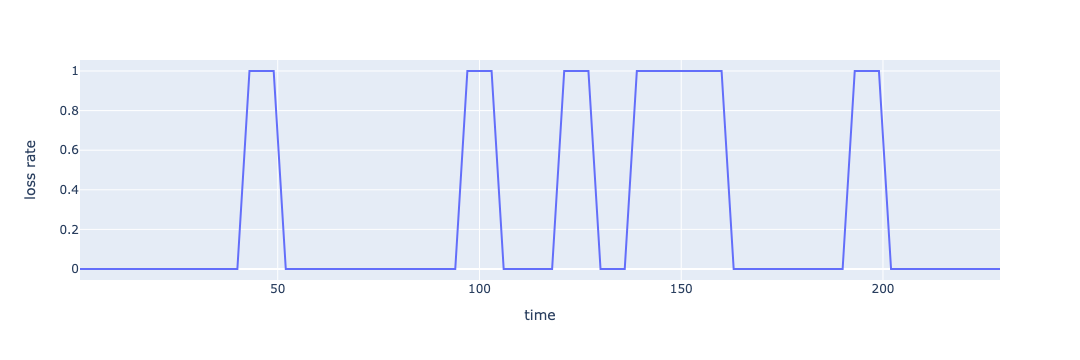

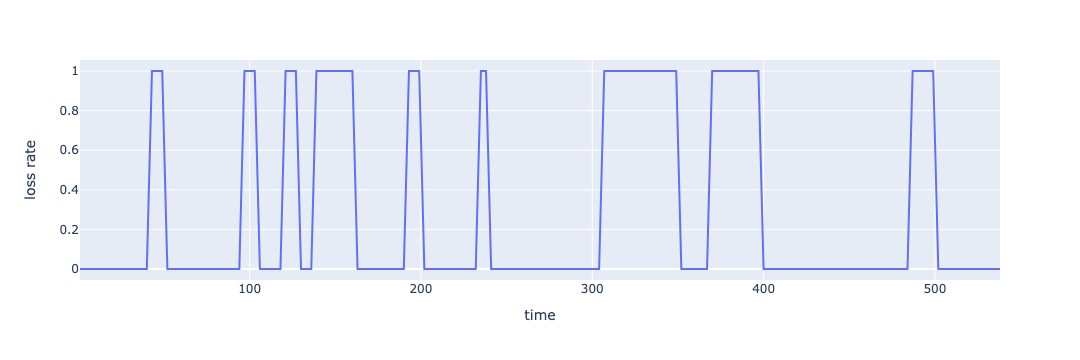

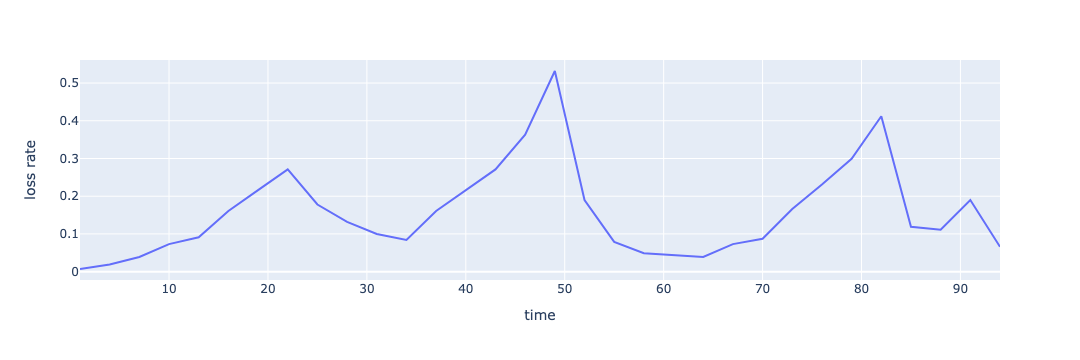

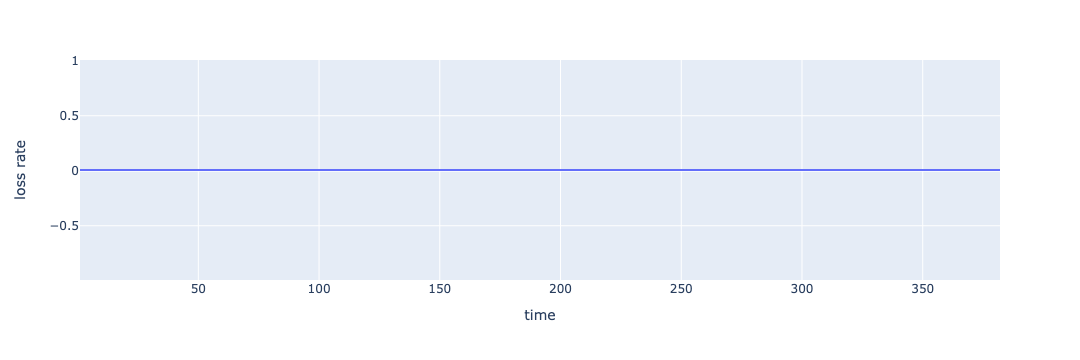

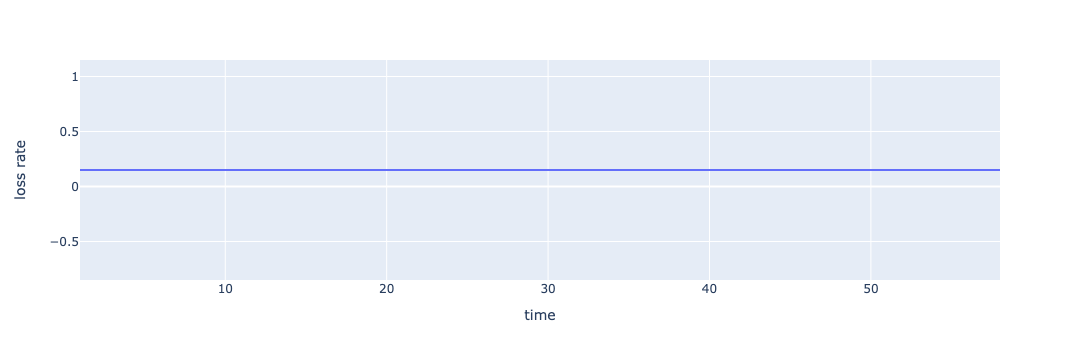

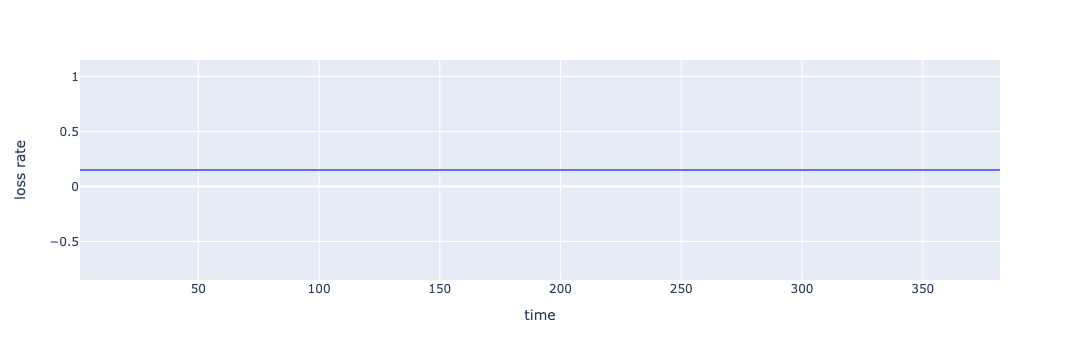

In [25]:
for index,sim in enumerate(sims):
    df=sim[0]
    name=df.name+'_loss'
    fig = px.line(df.query("type=='send'"), x="time", y="loss rate")
    fig.show()
    fig.update_layout(title_text=None,
                      xaxis_title="Time",
                      yaxis_title="Loss rate",
                      margin=dict(l=100, r=20, t=10, b=4),
                      font=dict(
                        family="New Times Roman",
                        size=20,
                    ))
    fig.write_image(figues_path+name+".pdf")

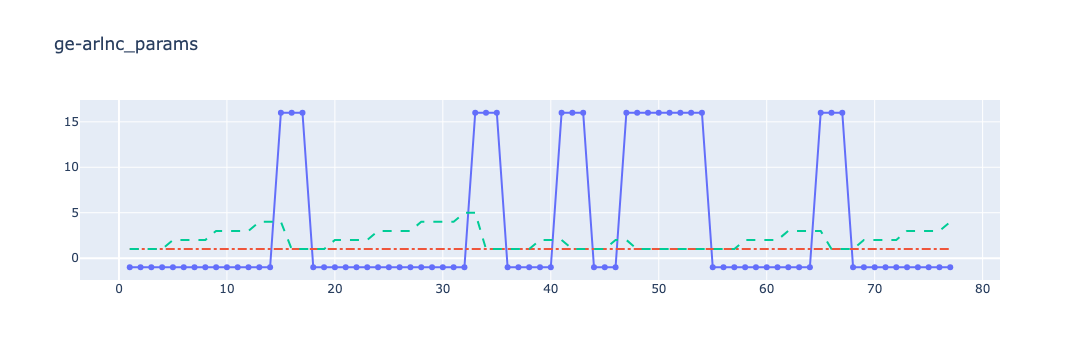

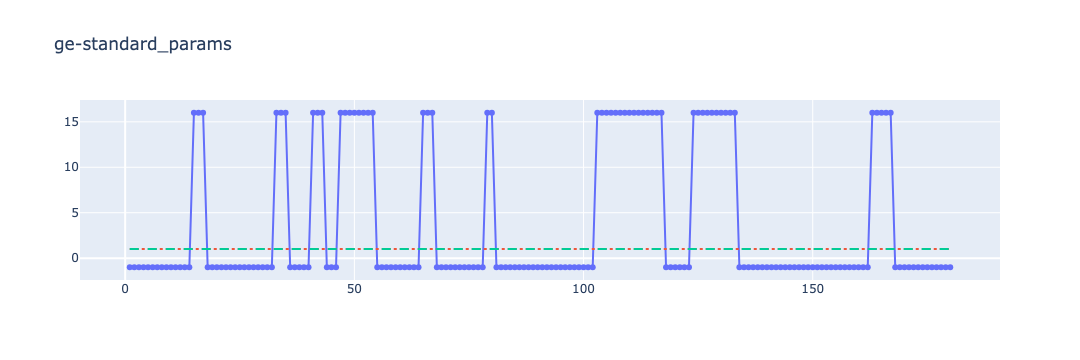

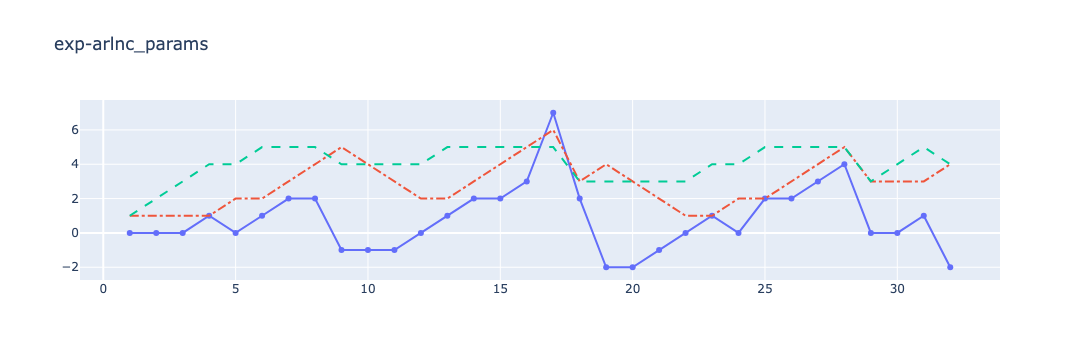

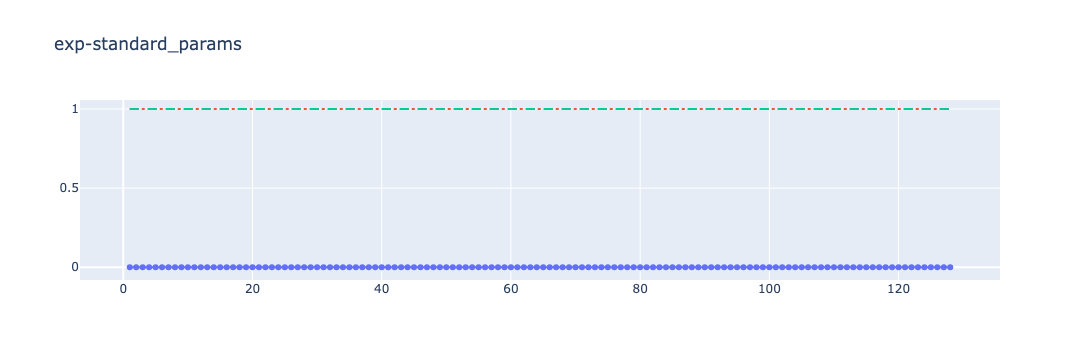

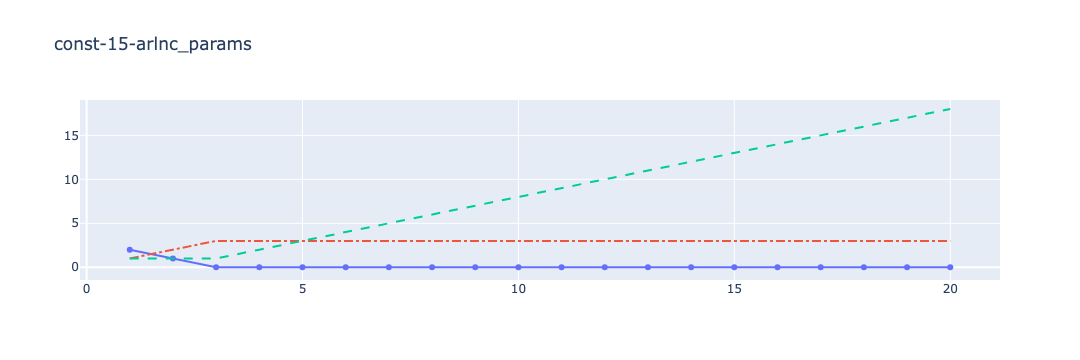

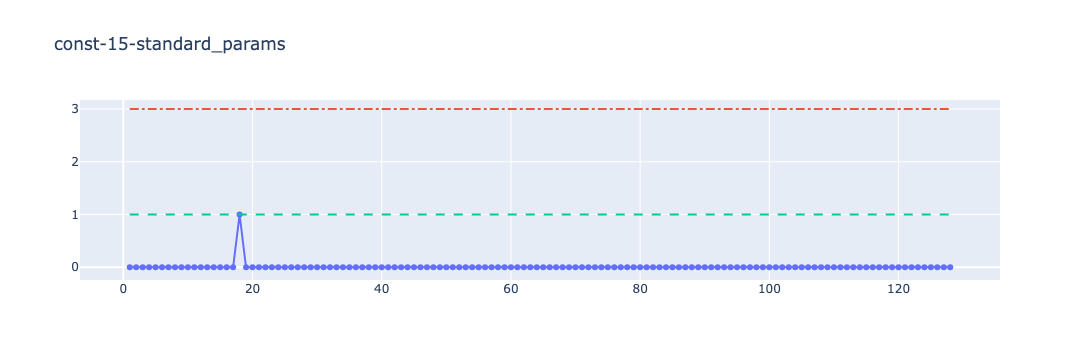

In [26]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+'_params'
    fig.update_layout(title_text=name,)


    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='feedback'")["average feedback"],
        mode="lines+markers",
        name="Average feedback value",
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["redundancy"],
        line=dict( width=2, dash='dashdot'),
        name="Redundancy",
        showlegend=False
    ))
    
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["window size"],
        line=dict( width=2, dash='dash'),
        name="Generation window size",
        showlegend=False
    ))


    fig.show()
    fig.update_layout(title_text=None,
                      xaxis_title="Time",
                      yaxis_title="Value",
                      margin=dict(l=100, r=20, t=10, b=4),
                      font=dict(
                        family="New Times Roman",
                        size=20,
                    ))
    fig.write_image(figues_path+name+".pdf")


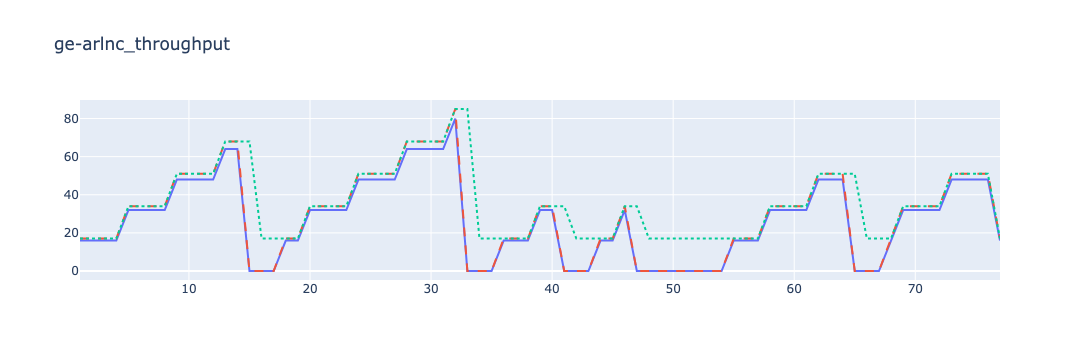

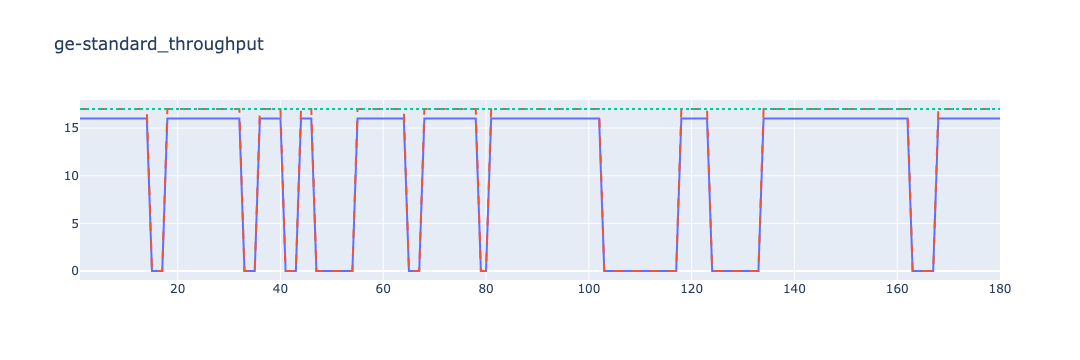

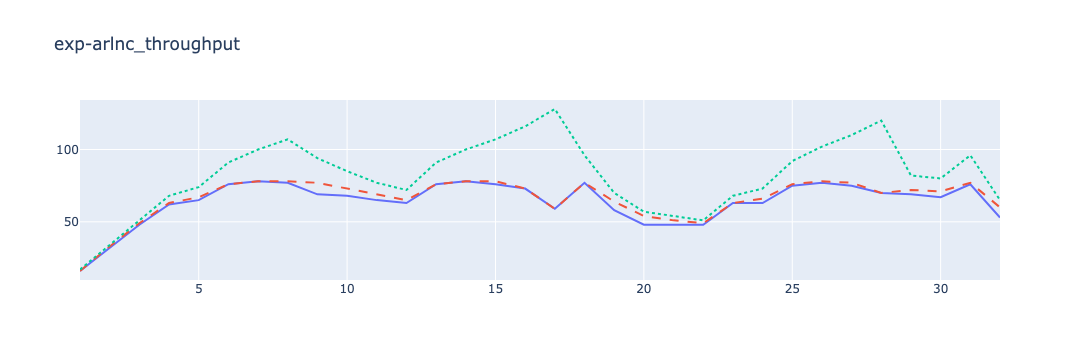

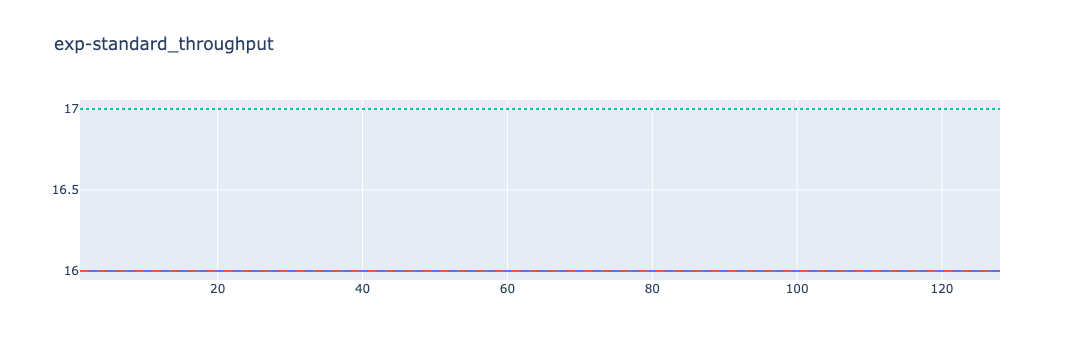

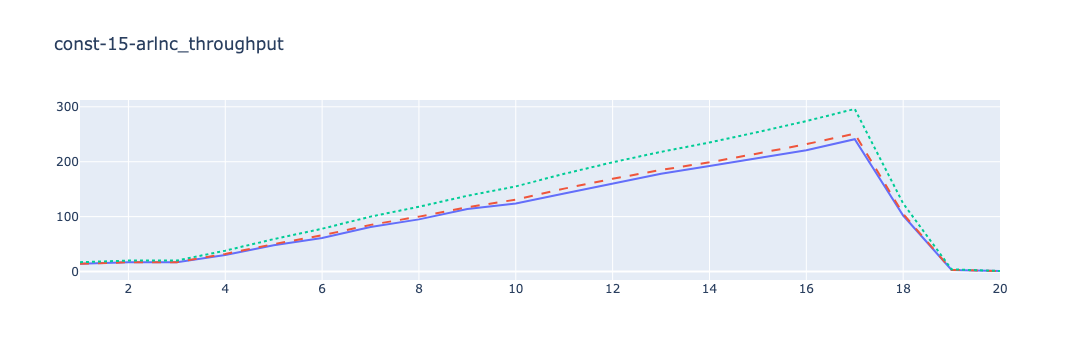

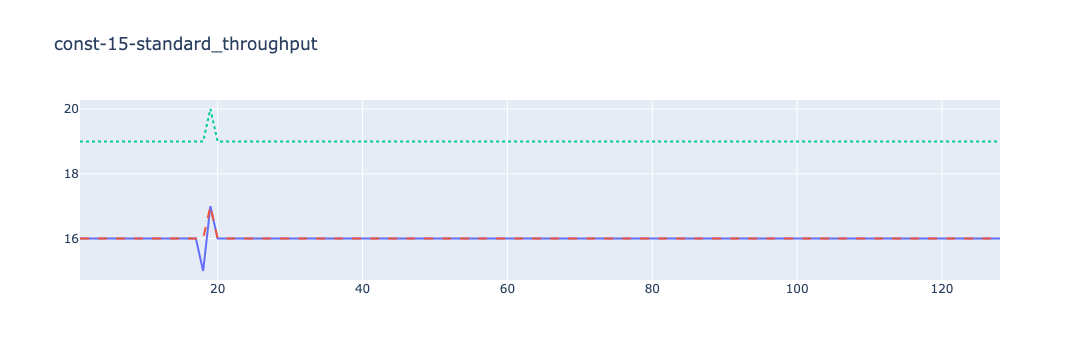

In [27]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+'_throughput'
    fig.update_layout(title_text=name)

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["effective packets"],
        line=dict( width=2),
        name="Effective packets",
        textposition="top center",
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["received packets"],
        line=dict(width=2, dash='dash'),
        name="Received packets",
        textposition="top center",
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        line=dict(width=2, dash='dot'),
        name="Total sent packets",
        textposition="top center",
        showlegend=False
    ))



    fig.show()
    fig.update_layout(title_text=None,
                      xaxis_title="Time",
                      yaxis_title="Number of packets",
                      margin=dict(l=100, r=20, t=10, b=4),
                      font=dict(
                        family="New Times Roman",
                        size=20,
                    ))
    fig.write_image(figues_path+name+".pdf")


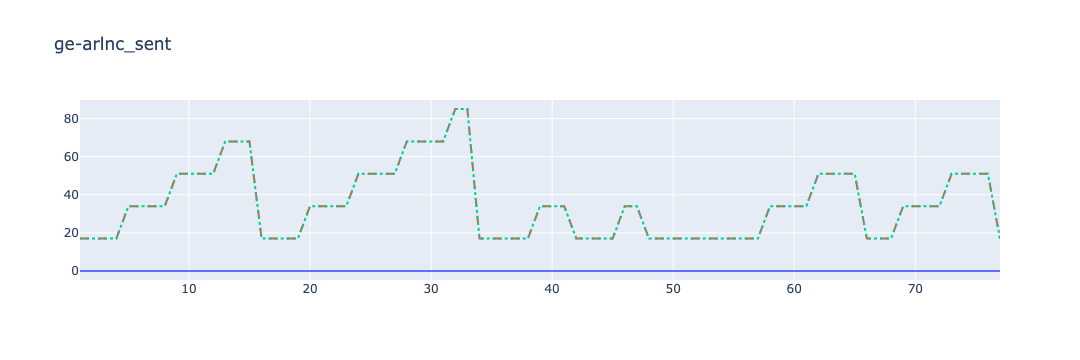

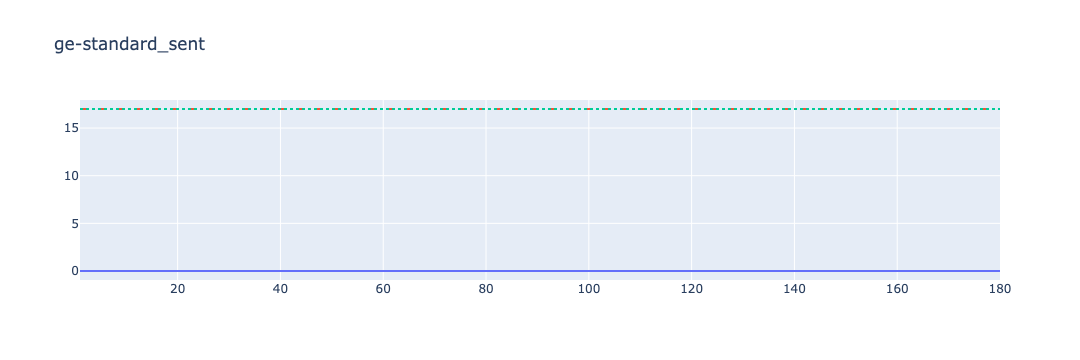

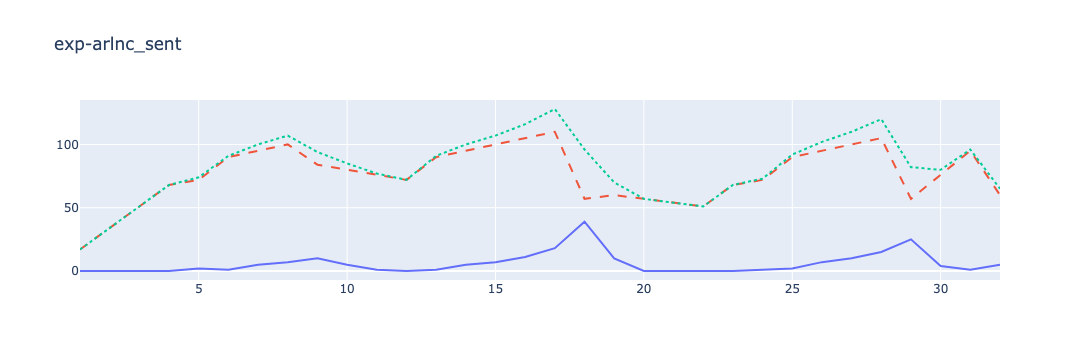

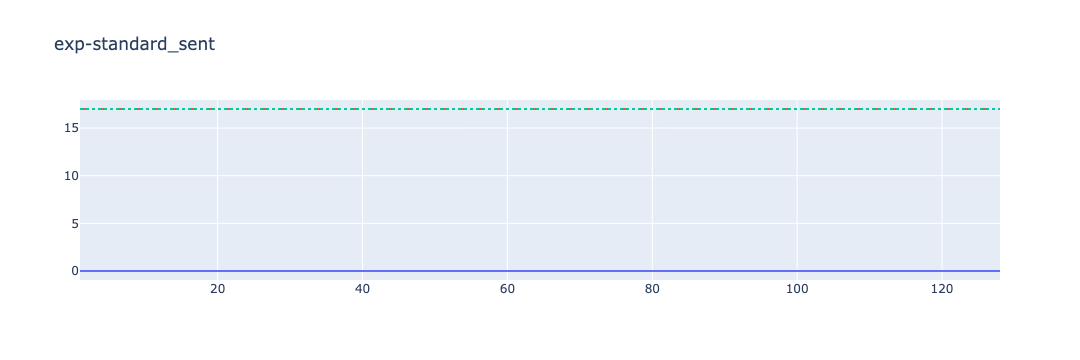

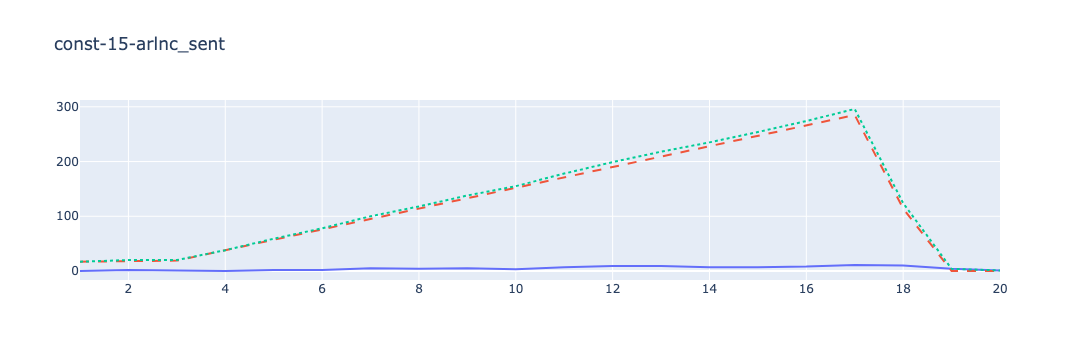

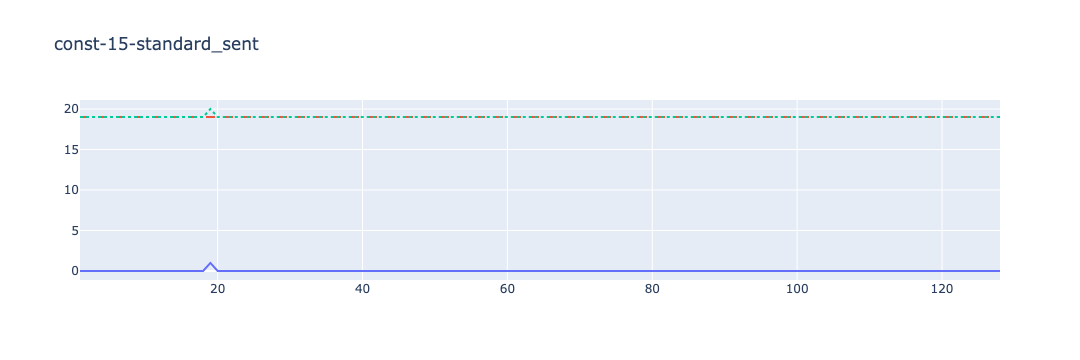

In [28]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+'_sent'
    fig.update_layout(title_text=name)
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["extra packets count"],
        mode="lines",
        name="Extra packets",
        textposition="top center",
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["new coded packets count"],
        mode="lines",
        name="New packets",
        line=dict(width=2, dash='dash'),
        textposition="top center",
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        line=dict(width=2, dash='dot'),
        mode="lines",
        name="Total packets",
        textposition="top center",
        showlegend=False
    ))
    fig.show()
    fig.update_layout(title_text=None,
                      xaxis_title="Time",
                      yaxis_title="Number of packets",
                      margin=dict(l=100, r=20, t=10, b=4),
                      font=dict(
                        family="New Times Roman",
                        size=20,
                    ))
    fig.write_image(figues_path+name+".pdf")


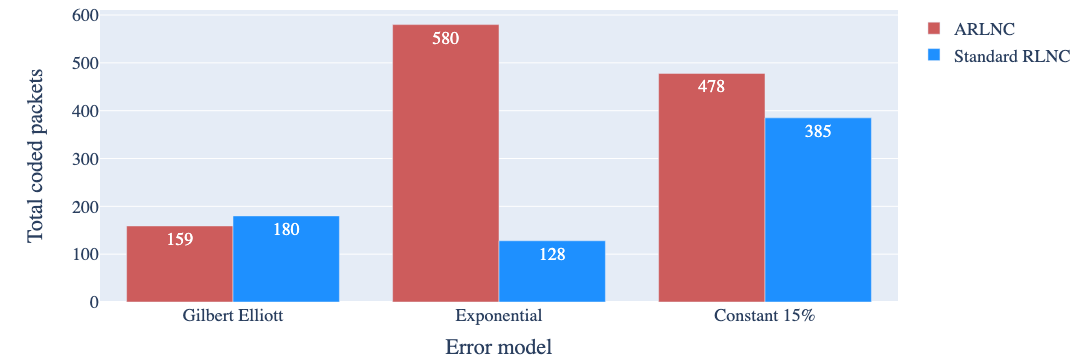

In [29]:
x_axis=[]
y_axis=[]
for index,sim in enumerate(sims):
    dataframe = sim[0]
    y=dataframe.query("type=='send'")["coded packets count"]
    x=dataframe.name
    x_axis.append(x)
    y_axis.append(sum(y))


models = ['Gilbert Elliott', 'Exponential', 'Constant 15%']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=models,
    y=y_axis[0:len(y_axis):2],
    name='ARLNC',
    texttemplate="%{y}",
    textposition="inside",
    textangle=0,
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=models,
    y=y_axis[1:len(y_axis):2],
    name='Standard RLNC',
    texttemplate="%{y}",
    textposition="inside",
    textangle=0,
    marker_color='dodgerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=0,title_text=None,
                  xaxis_title="Error model",
                  yaxis_title="Total coded packets",
                  margin=dict(l=100, r=20, t=10, b=4),
                  font=dict(
                    family="New Times Roman",
                    size=18,
                ))
fig.show()

fig.write_image(figues_path+"coded-packets"+".pdf")


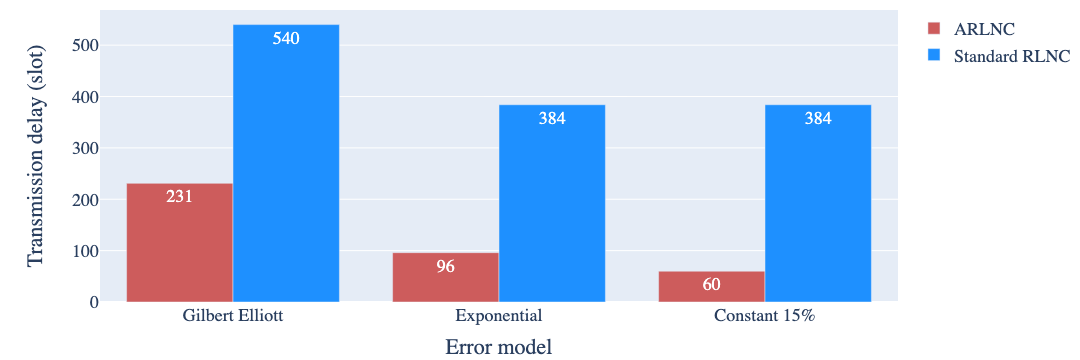

In [30]:
x_axis=[]
y_axis=[]
for index,sim in enumerate(sims):
    dataframe = sim[0]
    y=dataframe["time"]
    x=dataframe.name
    x_axis.append(x)
    y_axis.append(max(y))


models = ['Gilbert Elliott', 'Exponential', 'Constant 15%']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=models,
    y=y_axis[0:len(y_axis):2],
    name='ARLNC',
    texttemplate="%{y}",
    textposition="inside",
    textangle=0,
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=models,
    y=y_axis[1:len(y_axis):2],
    name='Standard RLNC',
    texttemplate="%{y}",
    textposition="inside",
    textangle=0,
    marker_color='dodgerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=0,title_text=None,
                  xaxis_title="Error model",
                  yaxis_title="Transmission delay (slot)",
                  margin=dict(l=100, r=20, t=10, b=4),
                  font=dict(
                    family="New Times Roman",
                    size=18,
                ))
fig.show()

fig.write_image(figues_path+"total-delay"+".pdf")


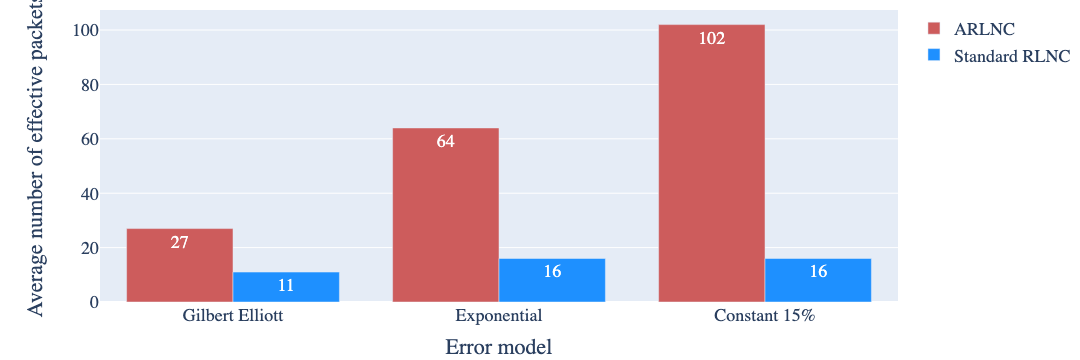

In [31]:
x_axis=[]
y_axis=[]
for index,sim in enumerate(sims):
    dataframe = sim[0]
    y=dataframe.query("type=='receive'")["effective packets"]
    x=dataframe.name
    x_axis.append(x)
    y_axis.append(np.round(sum(y)/len(y)))


models = ['Gilbert Elliott', 'Exponential', 'Constant 15%']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=models,
    y=y_axis[0:len(y_axis):2],
    name='ARLNC',
    texttemplate="%{y}",
    textposition="inside",
    textangle=0,
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=models,
    y=y_axis[1:len(y_axis):2],
    name='Standard RLNC',
    texttemplate="%{y}",
    textposition="inside",
    textangle=0,
    marker_color='dodgerblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=0,title_text=None,
                  xaxis_title="Error model",
                  yaxis_title="Average number of effective packets",
                  margin=dict(l=100, r=20, t=10, b=4),
                  font=dict(
                    family="New Times Roman",
                    size=18,
                ))
fig.show()

fig.write_image(figues_path+"average-effective"+".pdf")
